# **NETFLIX EDA**

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("netflixData.csv")

In [6]:
data.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [7]:
#number of rows and columns
data.shape

(5967, 13)

In [8]:
#check null fields
data.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [9]:
data = data[["Title", "Description", "Content Type", "Genres","Production Country","Imdb Score",]]
data.head()

,Title,Description,Content Type,Genres,Production Country,Imdb Score
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV,United States,6.6/10
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers",South Korea,6.2/10
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies",Italy,6.4/10
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies,United States,6.6/10
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies",Canada,5.1/10


In [10]:
#drop column with null value
data = data.dropna()

In [11]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Title"] = data["Title"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Emily-
[nltk_data]     Indrakusuma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
data["Title"]

0                           unwel
1                            aliv
2       annefrank  parallel stori
3                         blackaf
4                    catsthemewvi
                  ...            
5958                         zozo
5960                zumbo dessert
5961    zz top littl ol band texa
5962                    الف مبروك
5965                      반드시 잡는다
Name: Title, Length: 5249, dtype: object

In [13]:
data["Imdb Score"] = data["Imdb Score"].str.replace('/10', '')

In [14]:
data["Imdb Score"]

0       6.6
1       6.2
2       6.4
3       6.6
4       5.1
       ... 
5958    6.7
5960    7.1
5961    7.4
5962    7.4
5965    6.5
Name: Imdb Score, Length: 5249, dtype: object

In [15]:
data["Imdb Score"] = data["Imdb Score"].apply(pd.to_numeric)

In [16]:
sample = data.sample(n=150)

Text(0, 0.5, 'number of production')

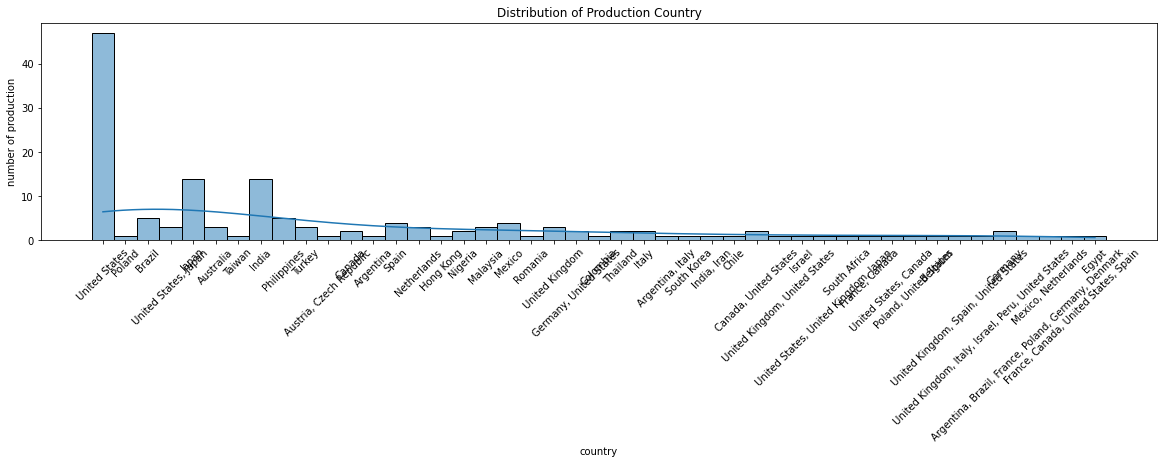

In [17]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Distribution of Production Country')
sns.histplot(sample['Production Country'], kde=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('country')
plt.ylabel('number of production')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d133eeb820>,
 'caps': [<matplotlib.lines.Line2D at 0x1d133eebdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d133eeb520>],
 'medians': [<matplotlib.lines.Line2D at 0x1d133efc3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d133efc940>],
 'means': [<matplotlib.lines.Line2D at 0x1d133efc670>]}

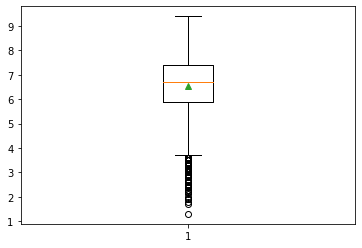

In [18]:
plt.boxplot(data['Imdb Score'], 0,'o',showbox=True,
            showfliers=True, showcaps=True, showmeans=True)

Text(3, 7, 'Skewness coeff. is:-0.627501671857504')

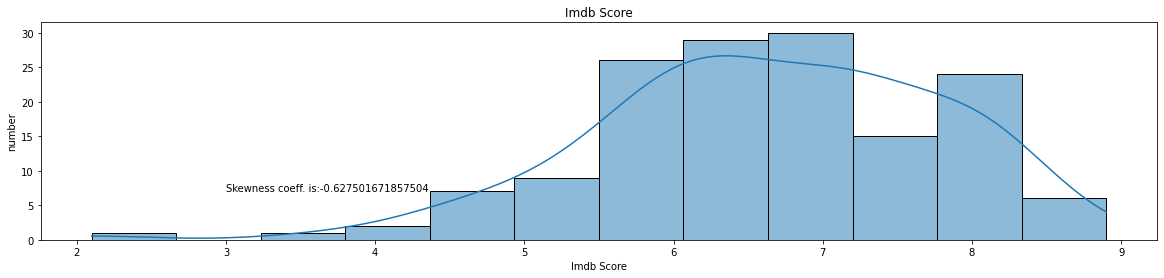

In [19]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Imdb Score')
sns.histplot(sample['Imdb Score'], kde=True)
plt.xlabel('Imdb Score')
plt.ylabel('number')
plt.text(3,7, 'Skewness coeff. is:' + str(data['Imdb Score'].skew()))

<AxesSubplot:xlabel='Content Type', ylabel='count'>

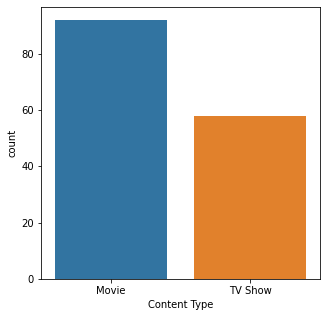

In [20]:
#import warning

import warnings
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(5, 5))
ax=plt.axes()
sns.countplot(sample['Content Type'])

In [21]:
pd.crosstab(index=sample['Content Type'], columns=[sample['Imdb Score']],
            margins=True).style.background_gradient(cmap='YlGn')

Imdb Score,2.100000,3.600000,4.000000,4.300000,4.500000,4.600000,4.700000,4.900000,5.000000,5.100000,5.200000,5.300000,5.400000,5.500000,5.600000,5.700000,5.800000,5.900000,6.000000,6.100000,6.200000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.100000,7.200000,7.300000,7.400000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,8.100000,8.200000,8.300000,8.400000,8.500000,8.600000,8.900000,All
Content Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,1,1,1,1,2,1,1,2,1,3,1,2,1,2,3,1,5,4,5,1,3,5,3,6,1,0,2,0,4,5,5,1,1,3,3,0,1,1,2,3,2,1,0,1,0,0,92
TV Show,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,1,2,0,4,2,2,0,3,2,2,2,0,5,2,2,0,1,2,3,1,5,2,3,0,2,1,1,1,58
All,1,1,1,1,3,1,1,2,1,3,1,2,2,3,4,1,5,7,6,3,3,9,5,8,1,3,4,2,6,5,10,3,3,3,4,2,4,2,7,5,5,1,2,2,1,1,150


In [22]:
pd.DataFrame(data.groupby('Production Country')['Imdb Score'].mean()).sort_values(ascending=False, by='Imdb Score')

,Imdb Score
Production Country,
"Ireland, United States, United Kingdom",8.7
"United States, Colombia, Mexico",8.7
"United Kingdom, United States, Japan",8.6
"United Kingdom, France, Poland, Germany, United States",8.6
"Romania, United Kingdom",8.6
...,...
Jordan,3.4
"United States, India, South Korea, China",3.3
Bulgaria,3.2
